In [25]:
import qmcpy as qp
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import cProfile
import pstats

In [36]:
def natural(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="natural",is_parallel=False)
    points = l.gen_samples(num_ports) 
    return points
def linear(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="linear" ,is_parallel=False)
    points = l.gen_samples(num_ports) 
    return points
def mps(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="mps" ,is_parallel=False)
    points = l.gen_samples(num_ports) 
    return points
def natural_thread(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="natural",is_parallel=True)
    points = l.gen_samples(num_ports) 
    return points
def natural_job(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="linear",is_parallel=True,exper_process=True)
    points = l.gen_samples(num_ports) 
    return points
def linear_thread(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="linear" ,is_parallel=True)
    points = l.gen_samples(num_ports) 
    return points
def linear_job(n, num_ports, seed=None):
    pass
def mps_thread(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="mps" ,is_parallel=True)
    points = l.gen_samples(num_ports) 
    return points
def mps_job(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="mps",is_parallel=True,exper_process=True)
    points = l.gen_samples(num_ports) 
    return points


In [37]:
n = 10
d_list = [50, 100, 200, 500, 1400, 3500]
data = {'index':d_list}
frame = pd.DataFrame(data)
frame = frame.set_index('index')
names = set()
trials = 10

run_list = [(mps_job, "mps job"),(mps_thread,"mps thread"),(natural_job, "natural job"),(natural_thread, "natural thread")]


for method,method_name in run_list:

    name = method_name.split(" ")

    names.add(name[0])

    times = []
    
    for d in d_list:
        profiler = cProfile.Profile()
        profiler.enable()
        for _ in range(trials):
            method(d, 2 ** n)
        profiler.disable()
        
        stats = pstats.Stats(profiler)
            
        process_time = stats.total_tt

        times.append(process_time)
        
    frame[method_name] = times  
stats.sort_stats('cumulative')

names = list(names)     
 
print(frame) 



        mps job  mps thread  natural job  natural thread
index                                                   
50     1.179964    0.141541     0.032874        0.074637
100    0.198062    0.140138     0.059615        0.084821
200    0.319125    0.180013     0.120912        0.135753
500    0.519899    0.297284     0.290376        0.289115
1400   1.022718    0.776654     0.803511        0.675724
3500   2.072478    1.636505     1.991659        1.615761


In [40]:
comparse= [('mps thread','mps job'),('natural thread','natural job')]


def speed_up_cal(data_frame, compare_list, dimension_list):
    result = []
    for seq,pro in compare_list:
        result = []
        for x in dimension_list:
            a = data_frame[seq][x]
            b = data_frame[pro][x]
            result.append(a/b)
        data_frame[seq + " speed-up"] = result


speed_up_cal(frame, comparse, d_list)
print(frame)

        mps job  mps thread  natural job  natural thread  mps thread speed-up  \
index                                                                           
50     1.179964    0.141541     0.032874        0.074637             0.119953   
100    0.198062    0.140138     0.059615        0.084821             0.707543   
200    0.319125    0.180013     0.120912        0.135753             0.564083   
500    0.519899    0.297284     0.290376        0.289115             0.571810   
1400   1.022718    0.776654     0.803511        0.675724             0.759401   
3500   2.072478    1.636505     1.991659        1.615761             0.789637   

       natural thread speed-up  
index                           
50                    2.270397  
100                   1.422815  
200                   1.122739  
500                   0.995655  
1400                  0.840964  
3500                  0.811264  


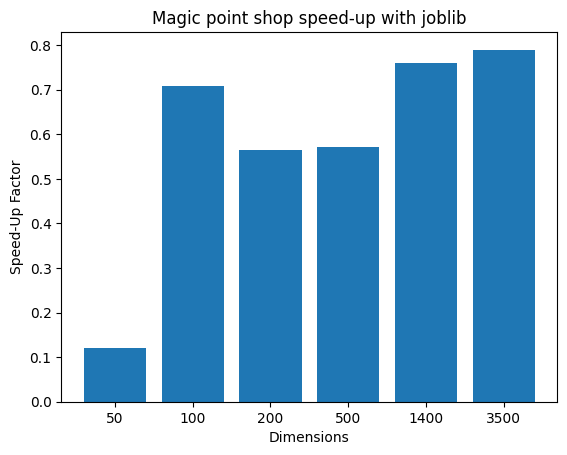

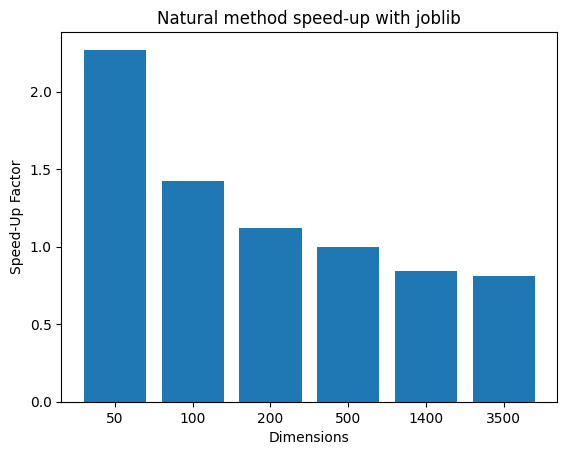

In [43]:
x = lambda array: [str(x) for x in array]

y_axis = frame["mps thread speed-up"].to_numpy()
x_axis = x(d_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Dimensions')
plt.ylabel('Speed-Up Factor')
plt.title('Magic point shop speed-up with joblib')
plt.show()

y_axis = frame["natural thread speed-up"].to_numpy()
x_axis = x(d_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Dimensions')
plt.ylabel('Speed-Up Factor')
plt.title('Natural method speed-up with joblib')
plt.show()

In [48]:
d = 10
p_list = [35, 3_500, 35_000, 350_000]
data = {'index':p_list}
frame2 = pd.DataFrame(data)
frame2 = frame2.set_index('index')
names = set()
trials = 1

run_list = [(mps_job, "mps job"),(mps_thread,"mps thread"),(natural_job, "natural job"),(natural_thread, "natural thread")]


for method,method_name in run_list:

    name = method_name.split(" ")

    names.add(name[0])

    times = []
    
    for p in p_list:
        profiler = cProfile.Profile()
        profiler.enable()
        for _ in range(trials):
            method(2 ** d, p)
        profiler.disable()
        
        stats = pstats.Stats(profiler)
            
        process_time = stats.total_tt

        times.append(process_time)
        
    frame2[method_name] = times  
stats.sort_stats('cumulative')

names = list(names)     
 
print(frame2) 

          mps job  mps thread  natural job  natural thread
index                                                     
35       0.951527    0.271834     0.069745        0.286875
3500     0.222699    0.369008     0.244074        0.192530
35000    2.754030    3.296920     3.791194        2.138144
350000  58.806589   94.507578    99.682483       31.061727


In [49]:
comparse= [('mps thread','mps job'),('natural thread','natural job')]


speed_up_cal(frame2, comparse, p_list)
print(frame2)


          mps job  mps thread  natural job  natural thread  \
index                                                        
35       0.951527    0.271834     0.069745        0.286875   
3500     0.222699    0.369008     0.244074        0.192530   
35000    2.754030    3.296920     3.791194        2.138144   
350000  58.806589   94.507578    99.682483       31.061727   

        mps thread speed-up  natural thread speed-up  
index                                                 
35                 0.285682                 4.113204  
3500               1.656985                 0.788816  
35000              1.197126                 0.563976  
350000             1.607092                 0.311607  


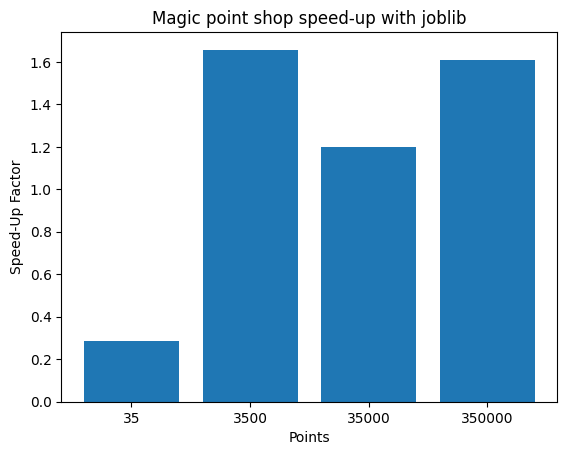

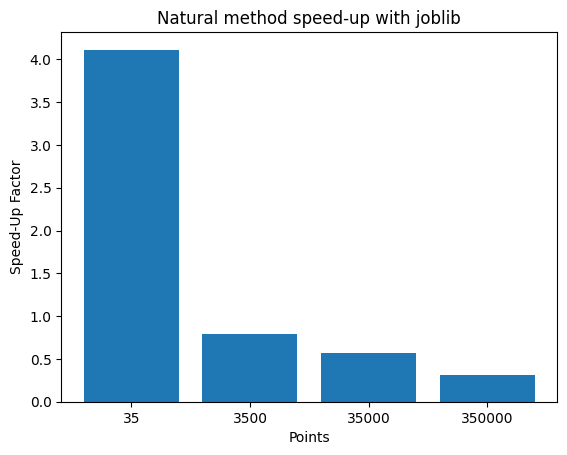

In [50]:
x = lambda array: [str(x) for x in array]

y_axis = frame2["mps thread speed-up"].to_numpy()
x_axis = x(p_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Points')
plt.ylabel('Speed-Up Factor')
plt.title('Magic point shop speed-up with joblib')
plt.show()

y_axis = frame2["natural thread speed-up"].to_numpy()
x_axis = x(p_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Points')
plt.ylabel('Speed-Up Factor')
plt.title('Natural method speed-up with joblib')
plt.show()
